In [4]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [5]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df=pd.read_csv(url,sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
X=df.drop('quality',axis=1)
Y=df['quality']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

In [8]:
svm=SVC(kernel="linear")
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [9]:
y_pred=svm.predict(x_test)

In [11]:
print("Linear SVM:")
print("Classification Report:\n",classification_report(y_test,y_pred))

Linear SVM:
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.55      0.53      0.54       291
           6       0.49      0.79      0.60       432
           7       0.00      0.00      0.00       192
           8       0.00      0.00      0.00        35

    accuracy                           0.51       980
   macro avg       0.17      0.22      0.19       980
weighted avg       0.38      0.51      0.43       980



C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


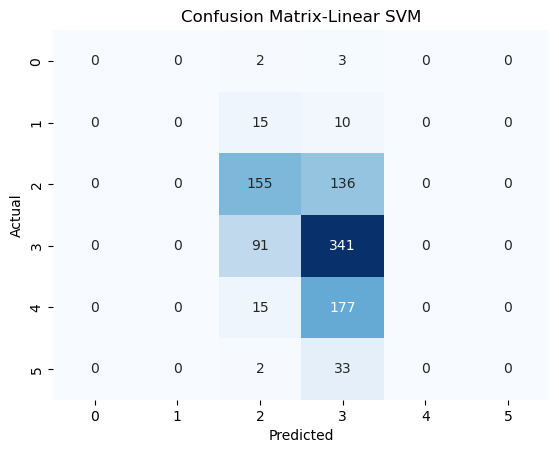

In [13]:
import matplotlib.pyplot as plt
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,cmap=plt.cm.Blues,cbar=False,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix-Linear SVM")
plt.show()

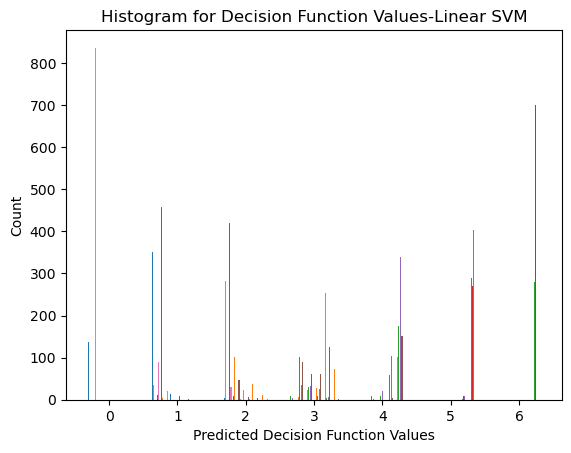

In [16]:
proba=svm.decision_function(x_test)
plt.hist(proba,bins=50)
plt.xlabel("Predicted Decision Function Values")
plt.ylabel("Count")
plt.title("Histogram for Decision Function Values-Linear SVM")
plt.show()

In [14]:
nonsvm=SVC(kernel="rbf",C=10,gamma=0.1)
nonsvm.fit(x_train,y_train)

SVC(C=10, gamma=0.1)

In [17]:
y_pred=nonsvm.predict(x_test)

In [18]:
print("Non Linear SVM:")
print("Classification Report:\n",classification_report(y_test,y_pred))

Non Linear SVM:
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.31      0.16      0.21        25
           5       0.62      0.60      0.61       291
           6       0.61      0.68      0.64       432
           7       0.60      0.53      0.56       192
           8       0.45      0.40      0.42        35

    accuracy                           0.60       980
   macro avg       0.43      0.39      0.41       980
weighted avg       0.59      0.60      0.59       980



C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


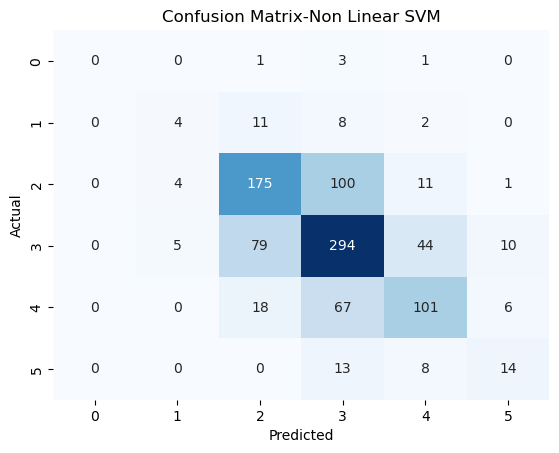

In [20]:
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,cmap=plt.cm.Blues,cbar=False,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix-Non Linear SVM")
plt.show()

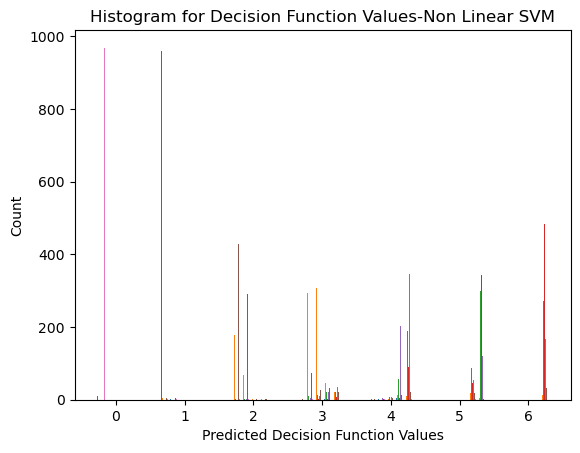

In [22]:
proba=nonsvm.decision_function(x_test)
plt.hist(proba,bins=50)
plt.xlabel("Predicted Decision Function Values")
plt.ylabel("Count")
plt.title("Histogram for Decision Function Values-Non Linear SVM")
plt.show()